# MNIST-Image Classification

In [21]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [3]:
# load train and test dataset
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()# load dataset
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))# reshape dataset to have a single channel
    testX = testX.reshape((testX.shape[0], 28, 28, 1))#reshape dataset to have a single channel
    trainY = to_categorical(trainY)# one hot encode target values
    testY = to_categorical(testY)# one hot encode target values
    return trainX, trainY, testX, testY

In [4]:
# scale pixels
def prep_pixels(train, test):
   # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [5]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# evaluate a model using k-fold cross-validation
def evaluate_model(model, dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
         # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
         # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [7]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
          #     plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['acc'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
    pyplot.show()

In [8]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [9]:
# run the test harness for evaluating a model
def run_test_harness():
   # load dataset
   trainX, trainY, testX, testY = load_dataset()
   # prepare pixel data
   trainX, testX = prep_pixels(trainX, testX)
   # define model
   model = define_model()
   # evaluate model
   scores, histories = evaluate_model(model, trainX, trainY)
   # learning curves
   summarize_diagnostics(histories)
   # summarize estimated performance
   summarize_performance(scores)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
> 98.550
> 99.825
> 99.992
> 100.000
> 100.000


C:\Users\LM00511384\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
C:\Users\LM00511384\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


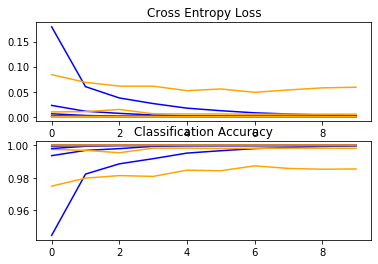

Accuracy: mean=99.673 std=0.566, n=5


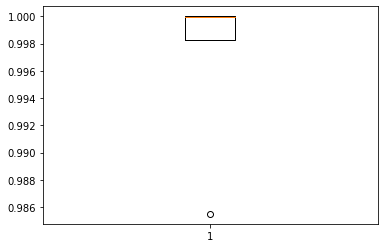

In [10]:
# entry point, run the test harness
run_test_harness()

There are many aspects of the learning algorithm that can be explored for improvement.

Perhaps the point of biggest leverage is the learning rate, such as evaluating the impact that smaller or larger values of the learning rate may have, as well as schedules that change the learning rate during training.

Another approach that can rapidly accelerate the learning of a model and can result in large performance improvements is batch normalization. We will evaluate the effect that batch normalization has on our baseline model.

Batch normalization can be used after convolutional and fully connected layers. It has the effect of changing the distribution of the output of the layer, specifically by standardizing the outputs. This has the effect of stabilizing and accelerating the learning process.

We can update the model definition to use batch normalization after the activation function for the convolutional and dense layers of our baseline model

In [23]:
# define cnn model
def define_model_batch():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
# run the test harness for evaluating a model
def run_test_harness_batch():
   # load dataset
   trainX, trainY, testX, testY = load_dataset()
   # prepare pixel data
   trainX, testX = prep_pixels(trainX, testX)
   # define model
   model = define_model_batch()
   # evaluate model
   scores, histories = evaluate_model(model, trainX, trainY)
   # learning curves
   summarize_diagnostics(histories)
   # summarize estimated performance
   summarize_performance(scores)

> 98.733
> 99.775
> 99.975
> 99.992
> 100.000


C:\Users\LM00511384\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
C:\Users\LM00511384\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


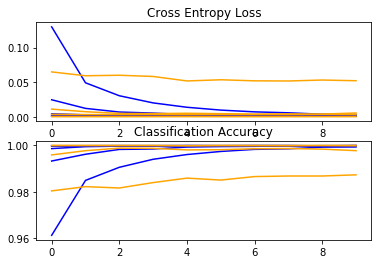

Accuracy: mean=99.695 std=0.488, n=5


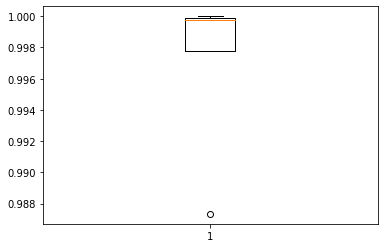

In [25]:
# entry point, run the test harness
run_test_harness_batch()

There are many ways to change the model configuration in order to explore improvements over the baseline model.

Two common approaches involve changing the capacity of the feature extraction part of the model or changing the capacity or function of the classifier part of the model. Perhaps the point of biggest influence is a change to the feature extractor.

We can increase the depth of the feature extractor part of the model, following a VGG-like pattern of adding more convolutional and pooling layers with the same sized filter, while increasing the number of filters. In this case, we will add a double convolutional layer with 64 filters each, followed by another max pooling layer.

In [26]:
# define cnn model
def define_model_add_pooling():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
# run the test harness for evaluating a model
def run_test_harness_add_pooling():
   # load dataset
   trainX, trainY, testX, testY = load_dataset()
   # prepare pixel data
   trainX, testX = prep_pixels(trainX, testX)
   # define model
   model = define_model_add_pooling()
   # evaluate model
   scores, histories = evaluate_model(model, trainX, trainY)
   # learning curves
   summarize_diagnostics(histories)
   # summarize estimated performance
   summarize_performance(scores)

> 98.792
> 99.892
> 99.958
> 100.000
> 100.000


C:\Users\LM00511384\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
C:\Users\LM00511384\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


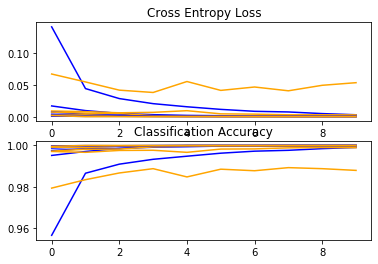

Accuracy: mean=99.728 std=0.470, n=5


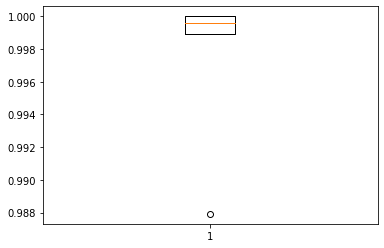

In [28]:
# entry point, run the test harness
run_test_harness_add_pooling()

Even the simplest CNN architecture gave an accuracy of 99.6% over other baseline models which had maximum accuracy for knn model-97.1(without hyper paarmeter tuning).
Further improving the model by increasing layers is a question whether higher accuracy or computation time is preferred.The increase in accuracy over improvement of model is just .1%.